### 线性SVM决策过程的可视化

In [3]:
#导入需要的模块
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

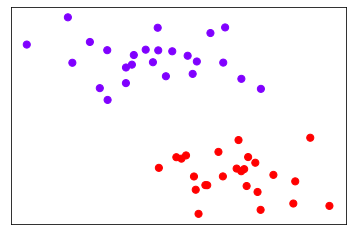

In [4]:
#实例化数据集，可视化数据集
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")  # 彩红颜色
plt.xticks([])
plt.yticks([])
plt.show()

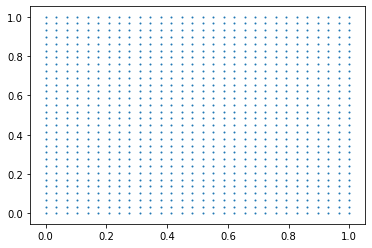

In [4]:
#画决策边界

#首先要有散点图
#plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#获取平面上两条坐标轴的最大值和最小值，找到两轴的范围
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)  # 在x轴均匀的打了30个点
axisy = np.linspace(ylim[0],ylim[1],30)

axisy,axisx = np.meshgrid(axisy,axisx)   
# 将一维向量转换为二维特征的矩阵的网格
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标，变成了30行30列

xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，取出900个点
# vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow");

In [5]:
#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])
#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)


In [6]:
np.meshgrid(a, b)

[array([[1, 2, 3],
        [1, 2, 3]]), array([[7, 7, 7],
        [8, 8, 8]])]

(-0.43660961990940284, 5.772756283035797)

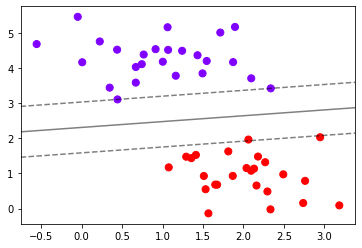

In [7]:
#画决策边界

#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#获取平面上两条坐标轴的最大值和最小值，找到两轴的范围
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)  # 在x轴均匀的打了30个点
axisy = np.linspace(ylim[0],ylim[1],30)

axisy,axisx = np.meshgrid(axisy,axisx)   
# 将一维向量转换为二维特征的矩阵的网格
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标，变成了30行30列

xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，取出900个点
# vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

#plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow");

#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离：几何间隔
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

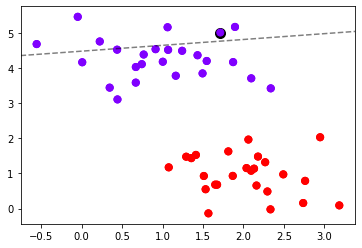

In [10]:
#记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#让我们用一个点来试试看
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=100,cmap="rainbow")  # 和它到决策边界的距离一致的900个点其中的点连成一条线

clf.decision_function(X[10].reshape(1,2))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=[-3]   # 距离
            ,alpha=0.5
            ,linestyles=["--"])

In [11]:
#将绘图过程包装成函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

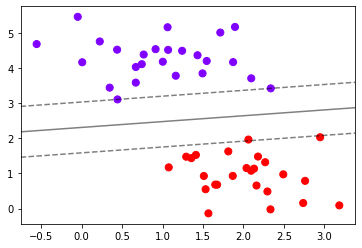

In [13]:
#则整个绘图过程可以写作：

clf = SVC(kernel = 'linear').fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [15]:
#探索建好的模型
clf.predict(X)

#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

1.0

In [24]:
# 将每一个样本在每一个标签的类别的概率值输出出来
#clf = SVC(kernel = 'linear', probability = True).fit(X, y)
#clf.predict_proba(X)

In [17]:
#返回给定测试数据和标签的平均准确度
clf.score(X, y)

#返回支持向量
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [18]:
#返回每个类中支持向量的个数
clf.n_support_

array([2, 1], dtype=int32)

In [20]:
# 返回线性方程
# 首先查看w的值
clf.coef_
# 查看b值
clf.intercept_

array([3.18971354])

In [21]:
#返回对偶当中非0的a的ai * yi的值
clf.dual_coef_

array([[-0.2672062, -0.7327938,  1.       ]])

### 推广到非线性情况 软间隔

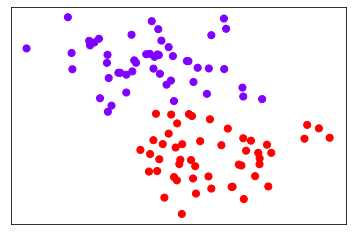

In [26]:
#实例化数据集，可视化数据集
X,y = make_blobs(n_samples=100, centers=2, random_state=0,
                 cluster_std=0.85)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")  # 彩红颜色
plt.xticks([])
plt.yticks([])
plt.show()

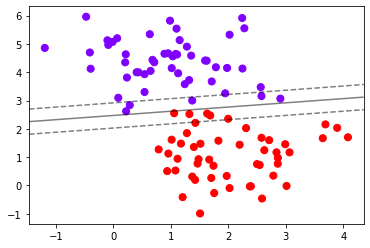

In [32]:
#尝试用我们已经定义的函数来划分这个数据的决策边界
#尝试更改C的惩罚值，看一下效果

clf = SVC(kernel = 'linear', C = 1).fit(X, y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

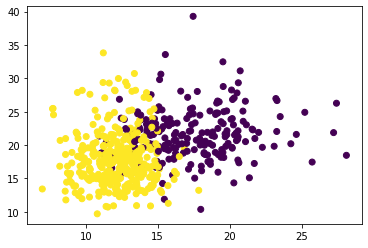

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X.shape
np.unique(y)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [39]:
from sklearn.model_selection import cross_val_score


clf = SVC(kernel = 'linear', C = 10)
cross_val_score(clf, X, y, cv = 5).mean()

# C = 1情景下
# 可能惩罚力度太小，从而导致模型在训练集上的效果就不好，导致前拟合

# C = 20情景下
# 惩罚力度太大了，虽然说训练集上的效果好，但是超平面的位置很容易会收到训练集里面噪音的影响，从而导致过拟合，测试集上的表现就不佳

0.9525694767893185

In [41]:
# #调线性核函数
# score = []
# C_range = np.linspace(0.01,30,50)
# for i in C_range:
#     clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
#     score.append(clf.score(Xtest,Ytest))

# print(max(score), C_range[score.index(max(score))])
# plt.plot(C_range,score)
# plt.show()

### 推广到非线性情况

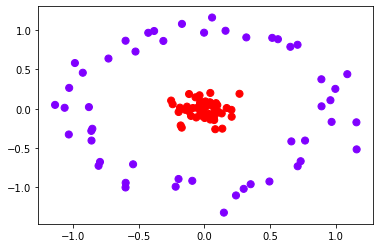

In [59]:
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#创建环形数据
X,y = make_circles(100, factor=0.1, noise=.1)
#绘制可视化图形
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow");

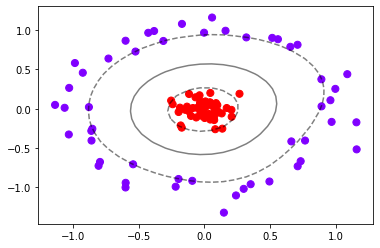

In [61]:
#尝试用我们已经定义的函数来划分这个数据的决策边界
clf = SVC(kernel = 'rbf', C = 1).fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [48]:
clf.score(X, y)

0.68

In [40]:
#为非线性数据增加维度并绘制3D图像
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)

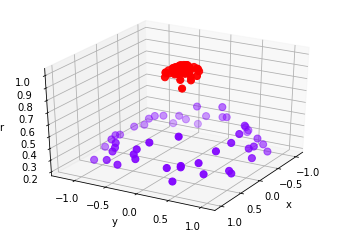

In [41]:
rlim = np.linspace(min(r),max(r),100)
from mpl_toolkits import mplot3d

#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()

In [20]:
#改变核函数


### 探索核函数在不同数据集上的表现

In [56]:
#导入相应模块和包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

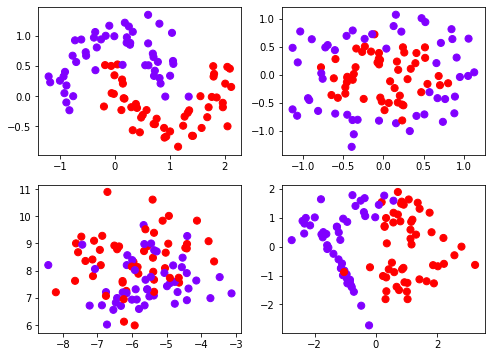

In [57]:
#创建数据集
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)  # 带信息或者不带信息
    ]

#四个数据集分别是什么样子呢？
plt.figure(figsize=(8,6))
for i in range(len(datasets)):
    X = datasets[i][0]
    Y = datasets[i][1]
    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

In [46]:
#[*enumerate(datasets)]
# index,(X,Y) = [(索引，array([特征矩阵X]，[标签Y]))]

/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: No contour levels were found within the data range.


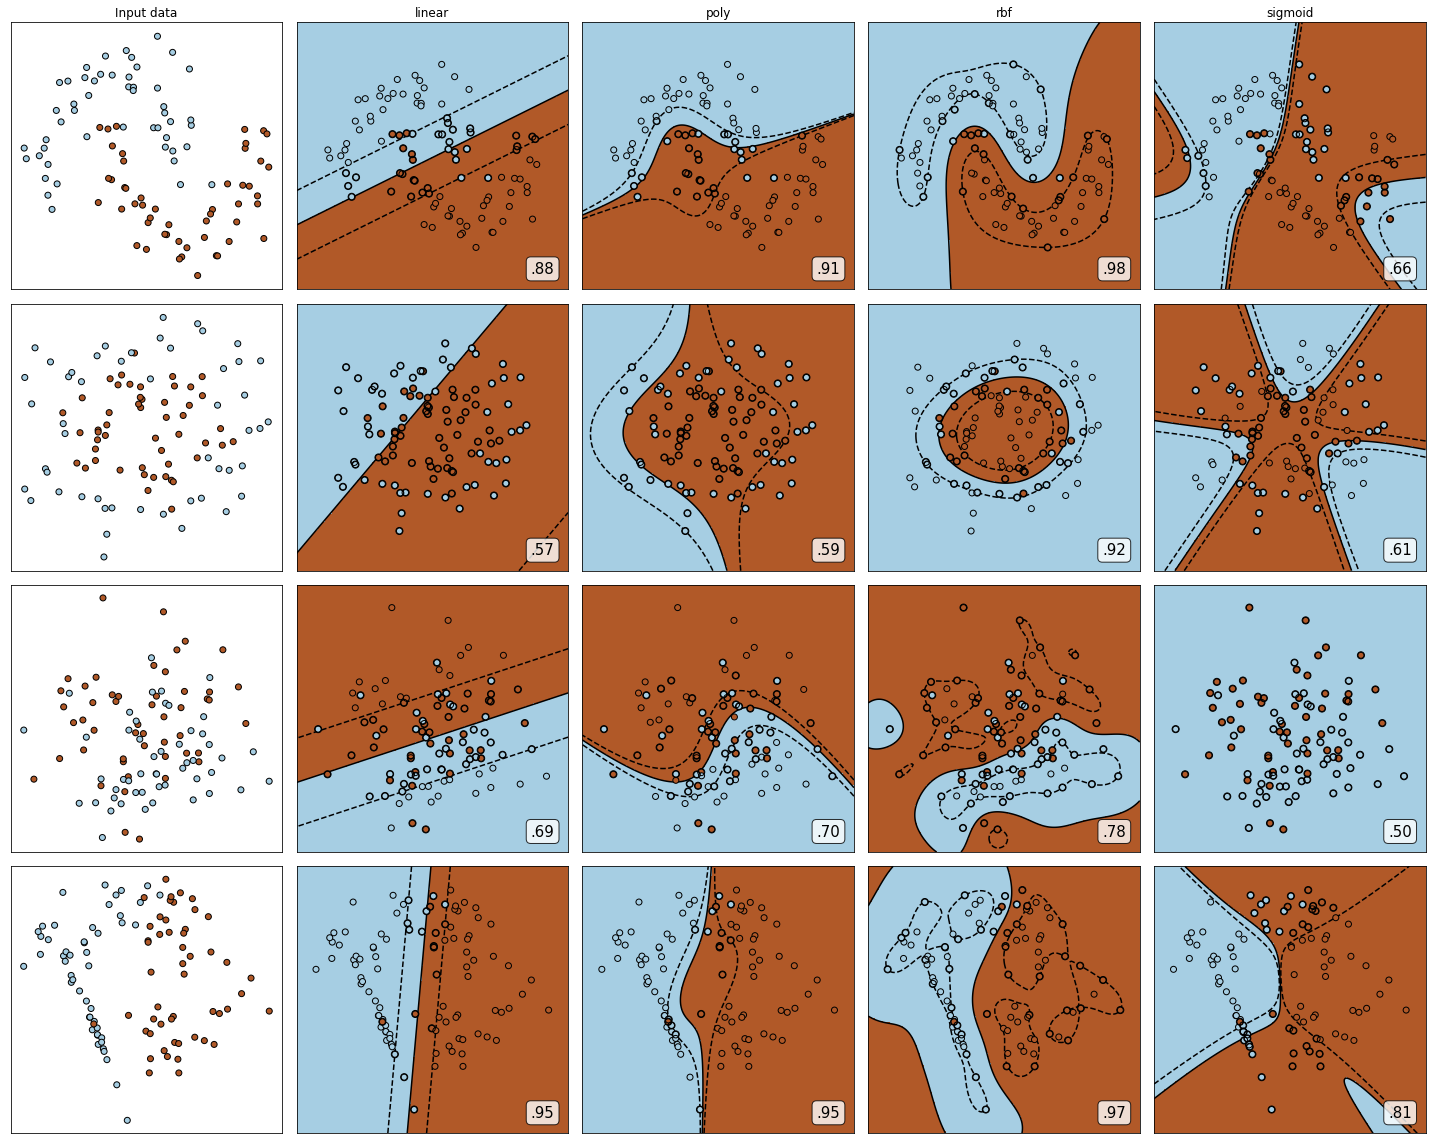

In [47]:
#定义核种类
Kernel = ["linear","poly","rbf","sigmoid"]

#构建子图
nrows=len(datasets)
ncols=len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#开始进行子图循环
#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")   # 第一行第一列加上标题
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')   
    # zorder 层级：让图像显示在上面或者下面，散点图最优先。数值越大层级越高；edgecolors：散点要有黑色的边缘
    ax.set_xticks(())  # 不要有标尺
    ax.set_yticks(())
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]  # 是从第一个图开始填
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量，在圈上面再画一个圈
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')   # 透明的，不要覆盖散点
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能  拉平！
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数   
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )

plt.tight_layout() # 紧缩一下子图
plt.show()

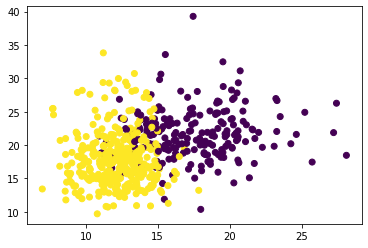

In [2]:
#探索核函数的优势和缺陷
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

data = load_breast_cancer()
X = data.data
y = data.target

X.shape
np.unique(y)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [4]:
#=================【time warning】===============#

Kernel = ["linear","poly","rbf","sigmoid"]

for i in Kernel:
    start = time()
    clf = SVC(kernel = i, gamma = 'auto', degree = 1)   # 可以直接尝试设置degree，只有当kernel = ‘poly'设置的degree才开始用
    clf.fit(Xtrain, Ytrain)
    end = time()
    print('Current Kernel is {}'.format(i))
    print(clf.score(Xtrain, Ytrain), clf.score(Xtest, Ytest))
    print(end - start)

Current Kernel is linear
0.9723618090452262 0.9298245614035088
0.3930928707122803
Current Kernel is poly
0.9673366834170855 0.9239766081871345
0.04671835899353027
Current Kernel is rbf
1.0 0.5964912280701754
0.009914159774780273
Current Kernel is sigmoid
0.6407035175879398 0.5964912280701754
0.00461125373840332


In [84]:
#数据标准化消除量纲不统一问题
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state = 10)

from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

In [85]:
# Kernel = ["linear","rbf","sigmoid"]

# for i in Kernel:
#     start = time()
#     clf = SVC(kernel = i, gamma = 'auto', degree = 1)   # 可以直接尝试设置degree，只有当kernel = ‘poly'设置的degree才开始用
#     clf.fit(Xtrain_, Ytrain)
#     end = time()
#     print('Current Kernel is {}'.format(i))
#     print(clf.score(Xtrain_, Ytrain), clf.score(Xtest_, Ytest))
#     print(end - start)

0.01


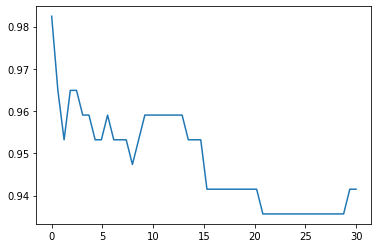

In [88]:
# 参数 C 的学习曲线
# 调线性核函数
import pandas as pd

score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel = 'linear', gamma = 'auto', C = i).fit(Xtrain_, Ytrain)
    score.append(clf.score(Xtest_, Ytest))
print(pd.Series(score, index = C_range).idxmax())
plt.plot(C_range, score)

# 发现，C越大的化，总体上来说，惩罚越大，条件越严格，线性SVM的间隔边界就变的越来越小，模型变得越来越复杂，导致当前过拟合和，所以在测试集上的分数，绝大多数都是下降的
# C越大，测试集上的分数就越低

3.6822448979591833


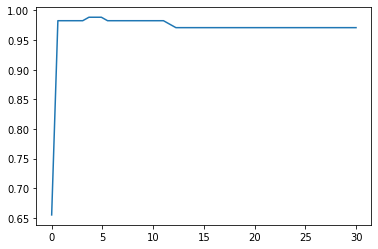

In [89]:
# 换rbf
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel = 'rbf', gamma = 'auto', C = i).fit(Xtrain_, Ytrain)
    score.append(clf.score(Xtest_, Ytest))
print(pd.Series(score, index = C_range).idxmax())
plt.plot(C_range, score)

# 发现，C越小的化，越前拟合。
# 但是发现C越大的化，在rbf下，还是可以在更加高的维度中找到一个超平面将数据分开，从而发现，C增大的过程中，测试集上的分数的变化会比较稳定

In [137]:
#数据标准化消除量纲不统一问题
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

In [152]:
# 使用网格搜索, 做学习曲线，虽然比较low，效率比较低，但是可以通过学习曲线来确定各个参数大致的范围
# 一旦这个范围确定了，就可以尝试来使用gridsearchcv进行搜索

from sklearn.model_selection import GridSearchCV

params = {
    'kernel' : ['linear', 'rbf', 'sigmoid'],
    'C' : np.linspace(0.1, 10, 30),
    'gamma' : [1e-3, 1e-4]
}

model = SVC()

grid_clf = GridSearchCV(model, params, cv = 10)
grid_clf.fit(Xtrain_, Ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([ 0.1       ,  0.44137931,  0.78275862,  1.12413793,  1.46551724,
        1.80689655,  2.14827586,  2.48965517,  2.83103448,  3.17241379,
        3.5137931 ,  3.85517241,  4.19655172,  4.53793103,  4.87931034,
        5.22068966,  5.56206897,  5.90344828,  6.24482759,  6.5862069 ,
        6.92758621,  7.26896552,  7.61034483,  7.95172414,  8.29310345,
        8.63448276,  8.97586207,  9.31724138,  9.65862069, 10.        ]),
                         'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [153]:
grid_clf.best_params_

{'C': 0.7827586206896552, 'gamma': 0.001, 'kernel': 'linear'}

In [154]:
# 一旦这个网格搜索相关模型训练好之后，简单的来理解,grid_clf自己就已经是一个SVC模型了，在这个模型里面了，加载就是它自己找到的最优的参数
grid_clf.score(Xtrain_, Ytrain), grid_clf.score(Xtest_, Ytest)

(0.9874371859296482, 0.9766081871345029)

In [157]:
# 验证grid_clf其实就是SVC的模型(加载了网格搜索中找到的最优的params)
model_svc = SVC(**grid_clf.best_params_).fit(Xtrain_, Ytrain)
model_svc.score(Xtrain_, Ytrain), model_svc.score(Xtest_, Ytest)

(0.9874371859296482, 0.9766081871345029)

In [155]:
# 使用随机森林和adaboost

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rfc = RandomForestClassifier().fit(Xtrain_, Ytrain)
adc = AdaBoostClassifier().fit(Xtrain_, Ytrain)

print(rfc.score(Xtrain_, Ytrain), rfc.score(Xtest_, Ytest))
print(adc.score(Xtrain_, Ytrain), adc.score(Xtest_, Ytest))

1.0 0.9707602339181286
1.0 0.9473684210526315


### 数据不平衡怎么办

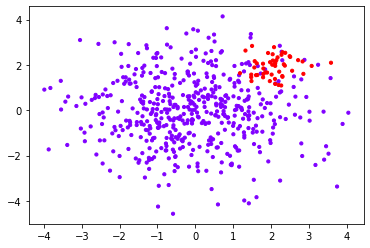

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
#其中红色点是少数类，紫色点是多数类

In [178]:
#不设定class_weight
model = SVC(kernel = 'linear').fit(X, y)

#设定class_weight
model_weight = SVC(kernel = 'linear', class_weight = 'balanced').fit(X, y)

#给两个模型分别打分看看，这个分数是accuracy准确度
model.score(X, y), model_weight.score(X, y)

(0.9418181818181818, 0.9109090909090909)

In [179]:
from sklearn.metrics import recall_score
Ypred = model.predict(X)
Ypred_weight = model_weight.predict(X)
recall_score(y, Ypred), recall_score(y, Ypred_weight)

(0.6, 1.0)

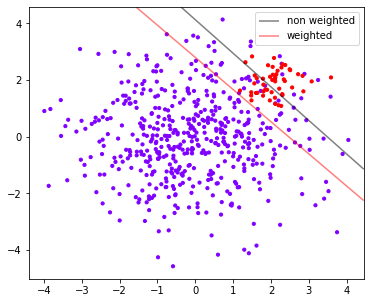

In [57]:
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])

Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])

#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

In [1]:
# 小案例

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

weather = pd.read_csv('small_example_df.csv', index_col = 0)
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,0
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,0
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,0
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,0
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,0
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,0


In [2]:
# 将特征矩阵和标签分开

X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [3]:
# 空缺值的探索

X.isna().mean()

Date             0.000000
Location         0.000000
MinTemp          0.006580
MaxTemp          0.002759
Rainfall         0.012736
Evaporation      0.439185
Sunshine         0.483761
WindGustDir      0.071747
WindGustSpeed    0.071322
WindDir9am       0.071959
WindDir3pm       0.029505
WindSpeed9am     0.009552
WindSpeed3pm     0.021015
Humidity9am      0.009977
Humidity3pm      0.026321
Pressure9am      0.108045
Pressure3pm      0.108682
Cloud9am         0.376990
Cloud3pm         0.403736
Temp9am          0.004670
Temp3pm          0.021227
dtype: float64

In [4]:
# 探索标签
Y.value_counts()

0    3701
1    1010
Name: 0, dtype: int64

In [5]:
# 切分一下数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,test_size=0.3)


In [6]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3274.0,12.305589,6.297860,-6.3,7.7,12.10,16.9,29.1
MaxTemp,3288.0,23.396290,6.855745,3.4,18.4,22.90,28.4,43.7
Rainfall,3257.0,1.316764,3.406476,0.0,0.0,0.00,0.4,21.8
Evaporation,1841.0,5.186420,3.209370,0.0,2.6,4.80,7.2,16.6
Sunshine,1686.0,7.865421,3.638291,0.0,5.3,8.75,10.7,14.0
WindGustSpeed,3057.0,38.620543,12.118306,9.0,30.0,37.00,46.0,80.0
WindSpeed9am,3261.0,13.344373,8.158933,0.0,7.0,13.00,19.0,39.0
WindSpeed3pm,3226.0,18.176689,8.216438,0.0,13.0,17.00,24.0,44.0
Humidity9am,3269.0,68.507189,18.454989,13.0,57.0,69.00,82.0,100.0
Humidity3pm,3214.0,51.038892,20.198518,1.0,36.0,52.00,65.0,100.0


In [7]:
#处理日期

#首先，日期不是独一无二的，日期有重复
#其次，在我们分训练集和测试集之后，日期也不是连续的，而是分散的
#某一年的某一天倾向于会下雨？或者倾向于不会下雨吗？
#不是日期影响了下雨与否，反而更多的是这一天的日照时间，湿度，温度等等这些因素影响了是否会下雨
#光看日期，其实感觉它对我们的判断并无直接影响
#如果我们把它当作连续型变量处理，那算法会人为它是一系列1~3000左右的数字，不会意识到这是日期,不如删了算了

In [8]:
Xtrain['Date'].value_counts()
#如果我们把它当作分类型变量处理，类别太多，有1648类，如果换成数值型，会被直接当成连续型变量，如果做成哑变量，我们特征的维度会爆炸

2009-08-23    7
2017-05-29    5
2011-06-12    5
2015-08-20    5
2017-04-28    5
             ..
2011-01-19    1
2016-08-01    1
2011-11-18    1
2008-12-03    1
2015-05-05    1
Name: Date, Length: 2030, dtype: int64

In [9]:
Xtrain[Xtrain['Date'] == '2009-11-29']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1404,2009-11-29,Witchcliffe,10.2,22.7,0.0,NaN,NaN,S,41.0,SSW,...,20.0,22.0,62.0,49.0,1015.9,1015.8,NaN,NaN,20.1,21.4
1654,2009-11-29,Albany,12.8,21.6,0.0,8.0,9.2,NaN,NaN,S,...,4.0,28.0,71.0,74.0,1015.0,1013.9,5.0,1.0,17.5,19.2
2130,2009-11-29,CoffsHarbour,22.3,37.7,9.8,7.6,11.3,NW,59.0,NE,...,13.0,31.0,58.0,11.0,1001.9,998.4,2.0,1.0,27.5,37.4


In [10]:
Xtrain.shape

(3297, 21)

In [11]:
# 看一下rainfall

Xtrain['Rainfall']

1708     0.4
1168     0.4
900     12.6
1485     0.2
436      0.0
        ... 
2387     0.0
1901     0.0
434      0.0
2583     1.2
2858     0.0
Name: Rainfall, Length: 3297, dtype: float64

In [12]:
# 将rainfall离散化， 小于1的值，标记成‘No’， 大于等于1的值，标记成‘yes'， 空值还是原来的空值

Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan  # 假设空值就是没有下雨，让它填成空值

Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

Xtrain.drop('Rainfall', axis = 1, inplace = True)
Xtest.drop('Rainfall', axis = 1, inplace = True)

/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [14]:
# 对Date进行处理, 取出月份

Xtrain.loc[:, 'Month'] = pd.to_datetime(Xtrain['Date']).dt.month
Xtest.loc[:, 'Month'] = pd.to_datetime(Xtest['Date']).dt.month

In [18]:
Xtrain.drop('Date', axis = 1, inplace = True) 
Xtest.drop('Date', axis = 1, inplace = True)

/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
Xtrain.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Month              int64
dtype: object

In [26]:
# 找出了所有的离散型的变量

cate = Xtrain.select_dtypes('object').columns.tolist()
cate

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [33]:
# 找出所有连续型的变量
continous = Xtrain.select_dtypes(['int64', 'float64']).columns.tolist()
continous

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month']

In [34]:
# 对于离散型的变量来说，我们使用众数来填补
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent').fit(Xtrain.loc[:, cate])

# 开始转换
Xtrain_cate = si.transform(Xtrain.loc[:, cate])
Xtest_cate = si.transform(Xtest.loc[:, cate])

In [35]:
# 对连续型的变量来说，可以尝试使用中位数来进行填补
impmedian = SimpleImputer(missing_values = np.nan, strategy = 'median').fit(Xtrain.loc[:, continous])

# 开始转换
Xtrain_continous = impmedian.transform(Xtrain.loc[:, continous])
Xtest_continous = impmedian.transform(Xtest.loc[:, continous])

In [40]:
# 对离散型的变量，需要进行独热编码
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder().fit(Xtrain_cate)
Xtrain_cate_ = onehot.transform(Xtrain_cate).toarray()
Xtest_cate_ = onehot.transform(Xtest_cate).toarray()

In [49]:
# 对连续型的变量，进行去量纲的操作
# 从原始的数据集当中，取出所有的连续的变量，看一下哪些特征不能做去量纲操作
Xtrain_continous = pd.DataFrame(Xtrain_continous, columns = continous)
Xtest_continous = pd.DataFrame(Xtest_continous, columns = continous)

In [57]:
# 以下三个特征不能来做去量纲的操作，需要单独拿出来, 后期进行拼接
careful_cols = ['Cloud9am', 'Cloud3pm', 'Month']
Xtrain_careful = Xtrain_continous.loc[:, careful_cols]
Xtest_careful = Xtest_continous.loc[:, careful_cols]

# 连续型训练集和测试集里的这些特征就删掉，准备去做标准化
Xtrain_continous.drop(careful_cols, axis = 1, inplace = True)
Xtest_continous.drop(careful_cols, axis = 1, inplace = True)

In [61]:
# 对剩下的连续型的变量来做标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(Xtrain_continous)
Xtrain_continous_ = pd.DataFrame(ss.transform(Xtrain_continous), columns = Xtrain_continous.columns)
Xtest_continous_ = pd.DataFrame(ss.transform(Xtest_continous), columns = Xtest_continous.columns)

In [94]:
# 尝试检测连续型变量cov
Xtrain_continous_.cov()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000303,0.732508,0.419957,0.018030,0.222278,0.213091,0.220440,-0.226127,0.029033,-0.450211,-0.465199,0.902953,0.697036
MaxTemp,0.732508,1.000303,0.488443,0.303383,0.130884,0.054557,0.098284,-0.482074,-0.491015,-0.350885,-0.441774,0.877702,0.971670
Evaporation,0.419957,0.488443,1.000303,0.306035,0.201166,0.198933,0.128804,-0.402075,-0.278911,-0.267459,-0.291861,0.483443,0.467574
Sunshine,0.018030,0.303383,0.306035,1.000303,-0.002681,0.001003,0.040882,-0.317356,-0.421474,0.023784,-0.030151,0.176604,0.317129
WindGustSpeed,0.222278,0.130884,0.201166,-0.002681,1.000303,0.561020,0.630448,-0.245991,-0.065487,-0.403457,-0.372838,0.196939,0.101870
WindSpeed9am,0.213091,0.054557,0.198933,0.001003,0.561020,1.000303,0.485669,-0.297896,-0.027484,-0.193464,-0.158492,0.170388,0.044653
WindSpeed3pm,0.220440,0.098284,0.128804,0.040882,0.630448,0.485669,1.000303,-0.161652,0.020246,-0.265462,-0.239433,0.209398,0.078488
Humidity9am,-0.226127,-0.482074,-0.402075,-0.317356,-0.245991,-0.297896,-0.161652,1.000303,0.636890,0.153616,0.198579,-0.455154,-0.474532
Humidity3pm,0.029033,-0.491015,-0.278911,-0.421474,-0.065487,-0.027484,0.020246,0.636890,1.000303,-0.005685,0.070332,-0.190708,-0.547949
Pressure9am,-0.450211,-0.350885,-0.267459,0.023784,-0.403457,-0.193464,-0.265462,0.153616,-0.005685,1.000303,0.962293,-0.433740,-0.307453


In [96]:
# 对训练集来做PCA的处理
from sklearn.decomposition import PCA
pca = PCA().fit(Xtrain_continous_)

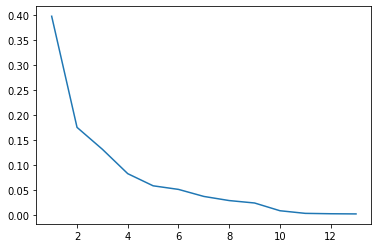

In [97]:
import matplotlib.pyplot as plt
plt.plot(range(1, 14), pca.explained_variance_ratio_)
# 通过手肘法，判断出，可能选10个特征就足够了

In [98]:
pca = PCA(n_components = 10).fit(Xtrain_continous_)
Xtrain_continous_PCA = pca.transform(Xtrain_continous_)
Xtest_continous_PCA = pca.transform(Xtest_continous_)

In [99]:
# 开始拼训练集

#Xtrain_final = pd.concat([pd.DataFrame(Xtrain_cate_), Xtrain_continous_, Xtrain_careful], axis = 1)
Xtrain_final_pca = pd.concat([pd.DataFrame(Xtrain_cate_), pd.DataFrame(Xtrain_continous_PCA), Xtrain_careful], axis = 1)

# 开始拼测试集
#Xtest_final = pd.concat([pd.DataFrame(Xtest_cate_), Xtest_continous_, Xtest_careful], axis = 1)
Xtest_final_pca = pd.concat([pd.DataFrame(Xtest_cate_), pd.DataFrame(Xtest_continous_PCA), Xtest_careful], axis = 1)

# 为了安全，Xtrain_final, Ytrain, Xtest_final, Ytest它们的行索引全部重新重置一遍
Xtrain_final.index = range(Xtrain_final.shape[0])
Ytrain.index = range(Ytrain.shape[0])
Xtest_final.index = range(Xtest_final.shape[0])
Ytest.index = range(Ytest.shape[0])

In [71]:
Xtrain_final.shape, Ytrain.shape

((3297, 115), (3297,))

In [72]:
Xtest_final.shape, Ytest.shape

((1414, 115), (1414,))

In [76]:
from sklearn.metrics import recall_score
from sklearn.svm import SVC

In [100]:
# 上模型,不带class weight
Kernel = ["linear","rbf","sigmoid"]

for i in Kernel:
    clf = SVC(kernel = i, gamma = 'auto', degree = 1)   # 可以直接尝试设置degree，只有当kernel = ‘poly'设置的degree才开始用
    clf.fit(Xtrain_final_pca, Ytrain)
    train_score = clf.score(Xtrain_final_pca, Ytrain)
    test_score = clf.score(Xtest_final_pca, Ytest)
    train_recall = recall_score(Ytrain, clf.predict(Xtrain_final_pca))
    test_recall = recall_score(Ytest, clf.predict(Xtest_final_pca))
    print('Current Kernel is {}'.format(i))
    print('训练集上的分数为{}, 测试集上的分数为{}, 训练集上的召回率为{}, 测试集上的召回率为{}'.format(train_score, test_score, train_recall, test_recall))

Current Kernel is linear
训练集上的分数为0.8474370639975736, 测试集上的分数为0.8500707213578501, 训练集上的召回率为0.45014245014245013, 测试集上的召回率为0.4577922077922078
Current Kernel is rbf
训练集上的分数为0.8495602062481044, 测试集上的分数为0.8486562942008486, 训练集上的召回率为0.3817663817663818, 测试集上的召回率为0.37987012987012986
Current Kernel is sigmoid
训练集上的分数为0.7312708522899606, 测试集上的分数为0.7227722772277227, 训练集上的召回率为0.31339031339031337, 测试集上的召回率为0.30844155844155846


In [101]:
# 上模型,不带class weight
Kernel = ["linear","rbf","sigmoid"]

for i in Kernel:
    clf = SVC(kernel = i, gamma = 'auto', class_weight = 'balanced')   # 可以直接尝试设置degree，只有当kernel = ‘poly'设置的degree才开始用
    clf.fit(Xtrain_final_pca, Ytrain)
    train_score = clf.score(Xtrain_final_pca, Ytrain)
    test_score = clf.score(Xtest_final_pca, Ytest)
    train_recall = recall_score(Ytrain, clf.predict(Xtrain_final_pca))
    test_recall = recall_score(Ytest, clf.predict(Xtest_final_pca))
    print('Current Kernel is {}'.format(i))
    print('训练集上的分数为{}, 测试集上的分数为{}, 训练集上的召回率为{}, 测试集上的召回率为{}'.format(train_score, test_score, train_recall, test_recall))

Current Kernel is linear
训练集上的分数为0.7846527145890203, 测试集上的分数为0.7644978783592645, 训练集上的召回率为0.8133903133903134, 测试集上的召回率为0.7694805194805194
Current Kernel is rbf
训练集上的分数为0.7943585077343039, 测试集上的分数为0.7736916548797736, 训练集上的召回率为0.801994301994302, 测试集上的召回率为0.7727272727272727
Current Kernel is sigmoid
训练集上的分数为0.5674855929632999, 测试集上的分数为0.5636492220650636, 训练集上的召回率为0.5641025641025641, 测试集上的召回率为0.5487012987012987


In [102]:
# 上模型,不带class weight
Kernel = ["linear","rbf","sigmoid"]

for i in Kernel:
    clf = SVC(kernel = i, gamma = 'auto', class_weight = {0 : 1, 1 : 20})   # 可以直接尝试设置degree，只有当kernel = ‘poly'设置的degree才开始用
    clf.fit(Xtrain_final_pca, Ytrain)
    train_score = clf.score(Xtrain_final_pca, Ytrain)
    test_score = clf.score(Xtest_final_pca, Ytest)
    train_recall = recall_score(Ytrain, clf.predict(Xtrain_final_pca))
    test_recall = recall_score(Ytest, clf.predict(Xtest_final_pca))
    print('Current Kernel is {}'.format(i))
    print('训练集上的分数为{}, 测试集上的分数为{}, 训练集上的召回率为{}, 测试集上的召回率为{}'.format(train_score, test_score, train_recall, test_recall))

Current Kernel is linear
训练集上的分数为0.5392781316348195, 测试集上的分数为0.5297029702970297, 训练集上的召回率为0.9857549857549858, 测试集上的召回率为0.9545454545454546
Current Kernel is rbf
训练集上的分数为0.5626326963906582, 测试集上的分数为0.5367751060820368, 训练集上的召回率为0.9971509971509972, 测试集上的召回率为0.9448051948051948
Current Kernel is sigmoid
训练集上的分数为0.3260539884743706, 测试集上的分数为0.342998585572843, 训练集上的召回率为0.8504273504273504, 测试集上的召回率为0.8441558441558441
